<a id="project"></a>
# Анализ рынка компьютерных игр

1. [Анализ рынка компьюерных игр](#project)


2. [Введение](#beginning)


3. [Изучение общей информации](#start)


4. [Предобработка данных](#preprocessing)

    
5. [Анализ данных](#analysis)


6. [Портреты пользователей по регионам](#portraits)

    6.1. [Популярные жанры по регионам](#genres)
    
    6.2. [Популярные платформы по регионам](#platforms)
    
    6.3. [Влияние рейтинга ESRB на продажи по регионам](#ESRB)
    
    
7. [Проверка гипотез](#hypotesis)

    7.1. [Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hypotesis1)
    
    7.2. [Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные](#hypotesis2)
    

8. [Общий вывод](#summary)
    

<a id="beginning"></a>
# Введение

В ходе данной работы будет проанализирован рынок компьютерных игр, изменение продаж по годам и платформам.

На актуальном периоде будут определены платформы и жанры - лидеры продаж, рассмотрена зависимость продаж от отзывов критиков и пользователей.

Будут составлены портреты пользователей каждого региона: выделены самые популярные жанры и платформы по регионам и определено влияние рейтинга ESRB на продажи в каждом регионе.

Затем будут проверены статистические гипотезы о равенстве пользовательских рейтингов платформ Xbox One и PC;равенстве пользовательских рейтингов жанров Action и Sports.

И сделаны выводы о потенциально популярных продуктах для планирования рекламных кампаний.

В данной работе будут использованы доступные из открытых источников исторические данные (до декабря 2016 г.) о продажах игр, оценки пользователей и экспертов, жанры и платформы.

<a id="start"></a>
# Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
m = Mystem() 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from scipy import stats as st
from scipy.stats import levene
from math import factorial
from datetime import datetime
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

games = pd.read_csv('/datasets/games.csv')

pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


In [5]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11789,Grease Dance,PS3,2011.000,Misc,0.050,0.020,0.000,0.010,nan,tbd,T
1684,Enter the Matrix,XB,2003.000,Action,0.720,0.430,0.010,0.040,65.000,7.1,T
8242,MotoGP 15,PS4,2015.000,Racing,0.000,0.120,0.030,0.020,66.000,NaN,NaN
14798,Yuusha Shisu.,PSV,2016.000,Role-Playing,0.000,0.000,0.030,0.000,nan,NaN,NaN
267,Batman: Arkham Asylum,PS3,2009.000,Action,2.240,1.310,0.070,0.610,91.000,8.9,T
1679,NFL 2K,DC,1999.000,Sports,1.120,0.050,0.000,0.020,nan,NaN,NaN
7735,Test Drive Unlimited 2,PC,nan,Racing,0.050,0.110,0.000,0.030,72.000,5.7,T
16523,Icewind Dale II,PC,2002.000,Role-Playing,0.000,0.010,0.000,0.000,83.000,8.3,T
6583,The Elder Scrolls IV: Oblivion,PC,2006.000,Role-Playing,0.010,0.200,0.000,0.040,94.000,8.1,M
16267,The Book of Unwritten Tales 2,WiiU,2016.000,Adventure,0.000,0.010,0.000,0.000,nan,tbd,T


***Вывод***

В данных необходимо будет привести названия столбцов к нижнему регистру, обработать пропуски, проверить данные на наличие дубликатов, заменить типы данных и создать столбец с суммырным по всем регионам объёмам продаж.

<a id="preprocessing"></a>
# Предобработка данных

In [6]:
print('Названия столбцов')
games.columns

Названия столбцов


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведём **названия столбцов** к нижнему регистру.

In [7]:
games = games.rename(str.lower, axis='columns')

In [8]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


В **столбце name** тип данных object, есть два пропущенных значения. Можно их удалить, т.к. значений немного, и они очень старые - 1993 года. Здесь пропуски возникли по причине того, что данные очень старые.

In [9]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,nan,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,nan,NaN,NaN


In [10]:
games = games[games['name'].isnull() != True]

In [11]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В **столбце platform** нет пропущенных значений, дубликатов. Тип данных корректный.

Избавимся от NaN в **стоблце year_of_release** (таких значений 269 шт., они могли возникнуть из-за ошибок ввода данных, можно было бы заполнить, узнав фактические годы выхода игр, но т.к. данные составляют всего 1,6% от имеющихся данных, просто удалим их). Изменим тип данных в столбце year_of_release на uint16.

In [12]:
games[games['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.570,1.020,0.000,0.410,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.360,0.140,0.000,0.030,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,nan,Sports,0.010,0.000,0.000,0.000,43.000,tbd,E10+
16405,Freaky Flyers,GC,nan,Racing,0.010,0.000,0.000,0.000,69.000,6.5,T
16448,Inversion,PC,nan,Shooter,0.010,0.000,0.000,0.000,59.000,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,0.010,0.000,0.000,0.000,nan,NaN,NaN


In [13]:
games = games[games['year_of_release'].isnull() != True]

In [14]:
games['year_of_release'] = games['year_of_release'].astype('uint16')

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null uint16
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), object(5), uint16(1)
memory usage: 1.4+ MB


В **столбце genre** не осталось пропущенных значений. Имеющиеся 2 пропущенных значения были удалены, когда были удалены пропущенные значения для столбца name. Нет дубликатов.

In [16]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В столбцах с **объемами продаж** нет пропущенных значений.

В **столбце user_score** присутствуют значения tbd, т.е. to be determined, рейтинг ещё не определён, данные значения можно заменить на NaN для облегчения последующей обработки. После данной замены появляется возможность заменить тип данных в столбце на float.

In [17]:
games[games['user_score'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050,10.950,1.930,2.740,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000,0.010,0.000,0.000,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010,0.000,0.000,0.000,nan,NaN,NaN


In [18]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.450,2.590,0.000,0.660,nan,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.080,1.350,0.000,0.540,61.000,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.510,1.030,0.000,0.270,nan,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.650,0.570,0.000,0.200,71.000,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.520,0.540,0.000,0.180,nan,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.010,0.000,0.000,0.000,67.000,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.010,0.000,0.000,0.000,53.000,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.010,0.000,0.000,0.000,48.000,tbd,E
16704,Plushees,DS,2008,Simulation,0.010,0.000,0.000,0.000,nan,tbd,E


In [19]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [20]:
games[games['user_score'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050,10.950,1.930,2.740,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000,0.010,0.000,0.000,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010,0.000,0.000,0.000,nan,NaN,NaN


In [21]:
games['user_score'] = games['user_score'].astype('float64')

Пропуски в **столбцах с рейтингами** обрабатывать не будем, т.к. им нет корректной замены. Они могли возникнуть из-за того, что в базе данных, из которой переносились эти рейтинги, данные игры могли быть не оценены.

Создадим столбец с суммарными продажами по всем регионам **total_sales**

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,nan,nan,NaN,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,nan,nan,NaN,31.380


In [24]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000,16444.000,16444.000,16444.000,16444.000,7983.000,7463.000,16444.000
mean,2006.486,0.264,0.146,0.078,0.048,68.994,7.126,0.536
std,5.876,0.818,0.507,0.311,0.188,13.920,1.499,1.559
min,1980.000,0.000,0.000,0.000,0.000,13.000,0.000,0.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000,6.400,0.060
50%,2007.000,0.080,0.020,0.000,0.010,71.000,7.500,0.170
75%,2010.000,0.240,0.110,0.040,0.030,79.000,8.200,0.470
max,2016.000,41.360,28.960,10.220,10.570,98.000,9.700,82.540


***Вывод***

Данные во всех столбцах были обработаны, заменены на наиболее подходящие типы. Создам столбец total_sales с суммарными продажами по всех регионам.

<a id="analysis"></a>
# Анализ данных

Проведём исследовательский анализ данных.
1. Посмотрим на выпуск игр по годам.

In [25]:
games.pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum', 'count'])

,sum,count
,total_sales,total_sales
year_of_release,,
1980,11.380,9
1981,35.680,46
1982,28.880,36
1983,16.800,17
1984,50.350,14
1985,53.950,14
1986,37.080,21
1987,21.700,16


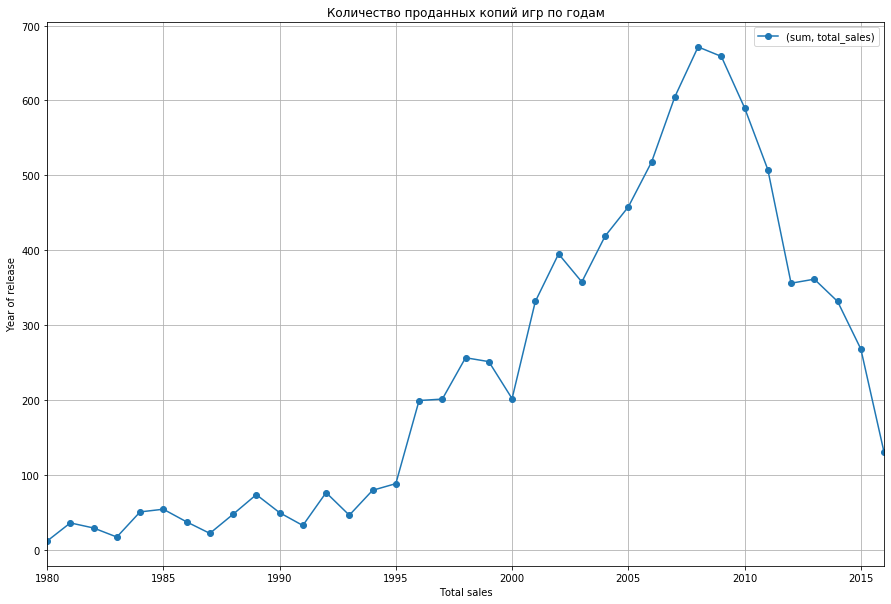

In [26]:
games.pivot_table(index=['year_of_release'], values='total_sales', aggfunc=['sum']).plot(style='o-', grid=True, figsize=(15, 10));
plt.ylabel('Year of release');
plt.xlabel('Total sales');
plt.title('Количество проданных копий игр по годам');
plt.legend(loc = 'best');

Для правильных выводов нам не нужны данные за ранние годы, когда индустрия игр только формировалась. Нужно будет выделить актуальный период для анализа, что мы и сделаем в дальнейшем исходя из срока жизни платформ и объёмов продаж.

2. Рассмотрим, как изменялись продажи по платформам. Выделим 11 платформ с наибольшими суммарными продажами и построим их распределение по годам (11, а не 10, чтобы включить продажи игр для PC, обычных компьютеров)

In [27]:
popular_platforms = games.pivot_table(index=['platform'], values='total_sales', aggfunc=['sum'])
popular_platforms.columns = ['total_sales']
popular_platforms = popular_platforms.sort_values(by = 'total_sales', ascending = False).head(11)
popular_platforms

,total_sales
platform,
PS2,1233.560
X360,961.240
PS3,931.340
Wii,891.180
DS,802.780
PS,727.580
PS4,314.140
GBA,312.880
PSP,289.530


In [28]:
popular_platforms_reset = popular_platforms.reset_index()
popular_platforms_reset

,platform,total_sales
0,PS2,1233.560
1,X360,961.240
2,PS3,931.340
3,Wii,891.180
4,DS,802.780
5,PS,727.580
6,PS4,314.140
7,GBA,312.880
8,PSP,289.530
9,3DS,257.810


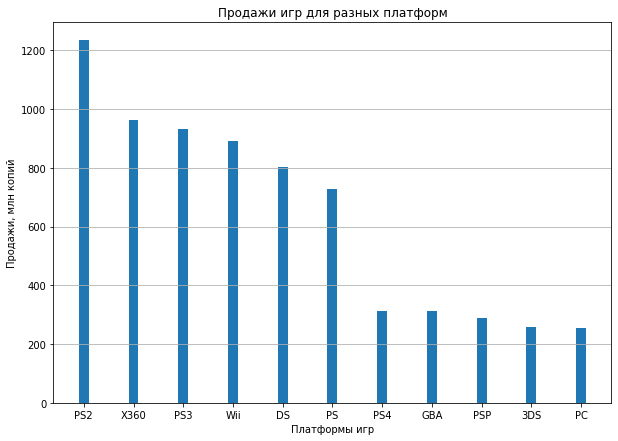

In [29]:
groups0 = popular_platforms_reset['platform']
width = 0.2
x0 = np.arange(len(groups0))


fig = plt.figure(figsize = (10, 7) );
ax = plt.axes();
ax.yaxis.grid(True, zorder = 1);
plt.bar(x0, popular_platforms_reset['total_sales'], width);
plt.ylabel('Продажи, млн копий');
plt.xlabel('Платформы игр');
plt.title('Продажи игр для разных платформ');
plt.xticks(x0, groups0);

In [30]:
top11_popular_platforms = games.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS", "PC")')

In [31]:
top11_popular_platforms_sales = top11_popular_platforms.pivot_table(index=['year_of_release'], columns = ['platform'], values='total_sales', aggfunc=['sum'])
top11_popular_platforms_sales.columns = ['3DS','DS', 'GBA', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360']
top11_popular_platforms_sales

,3DS,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,,
1985,nan,0.020,nan,0.040,nan,nan,nan,nan,nan,nan,nan
1988,nan,nan,nan,0.030,nan,nan,nan,nan,nan,nan,nan
1992,nan,nan,nan,3.030,nan,nan,nan,nan,nan,nan,nan
1994,nan,nan,nan,12.870,6.030,nan,nan,nan,nan,nan,nan
1995,nan,nan,nan,4.220,35.960,nan,nan,nan,nan,nan,nan
1996,nan,nan,nan,10.580,94.700,nan,nan,nan,nan,nan,nan
1997,nan,nan,nan,11.270,136.170,nan,nan,nan,nan,nan,nan
1998,nan,nan,nan,3.260,169.490,nan,nan,nan,nan,nan,nan
1999,nan,nan,nan,4.740,144.530,nan,nan,nan,nan,nan,nan


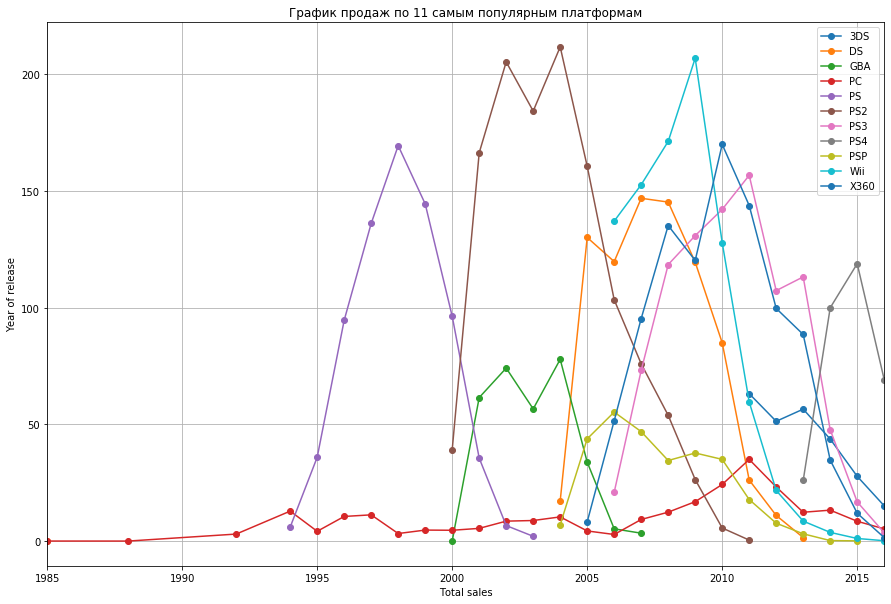

In [32]:
top11_popular_platforms_sales.plot(style='o-', grid=True, figsize=(15, 10))
plt.ylabel('Year of release')
plt.xlabel('Total sales')
plt.title('График продаж по 11 самым популярным платформам')
plt.legend(loc = 'best')

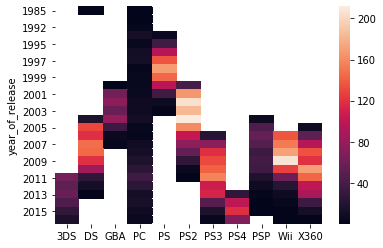

In [33]:
sns.heatmap(top11_popular_platforms_sales)

In [34]:
games.pivot_table(index=['year_of_release'], columns = ['platform'], values='total_sales', aggfunc=['sum'])

sum                                                         \
platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN   
year_of_release                                                                 
1980            11.380   nan    nan   nan     nan    nan    nan    nan    nan   
1981            35.680   nan    nan   nan     nan    nan    nan    nan    nan   
1982            28.880   nan    nan   nan     nan    nan    nan    nan    nan   
1983             5.840   nan    nan   nan     nan    nan    nan    nan    nan   
1984             0.270   nan    nan   nan     nan    nan    nan    nan    nan   
1985             0.450   nan    nan   nan   0.020    nan    nan    nan    nan   
1986             0.670   nan    nan   nan     nan    nan    nan    nan    nan   
1987             1.940   nan    nan   nan     nan    nan    nan    nan    nan   
1988             0.740   nan    nan   nan     nan  1.430    nan    nan    nan   
1989             0.630   nan    nan   nan     nan 64.970    nan    nan    nan   
1990               nan   nan    nan   nan     nan  4.890    nan    nan  2.600   
1991               nan   nan    nan   nan     nan  5.570    nan    nan  4.330   
1992               nan   nan    nan   nan     nan 25.490    nan    nan 12.640   
1993               nan   nan    nan   nan     nan    nan    nan    nan  0.650   
1994               nan 0.020    nan   nan     nan 12.180    nan    nan  8.130   
1995               nan 0.080    nan   nan     nan  3.600    nan    nan    nan   
1996               nan   nan    nan   nan     nan 36.030    nan    nan    nan   
1997               nan   nan    nan   nan     nan  6.370    nan    nan    nan   
1998               nan   nan    nan 3.380     nan 26.900    nan    nan    nan   
1999               nan   nan    nan 5.160     nan 38.000    nan    nan    nan   
2000               nan   nan    nan 5.990     nan 19.760  0.070    nan    nan   
2001               nan   nan    nan 1.070     nan  9.240 61.530 26.340    nan   
2002               nan   nan    nan 0.290     nan    nan 74.160 51.810    nan   
2003               nan   nan    nan   nan     nan    nan 56.670 50.610    nan   
2004               nan   nan    nan   nan  17.270    nan 77.910 28.820    nan   
2005               nan   nan    nan   nan 130.140    nan 33.860 27.620    nan   
2006               nan   nan    nan   nan 119.810    nan  5.280 11.260    nan   
2007               nan   nan    nan 0.020 146.940    nan  3.400  0.270    nan   
2008               nan   nan    nan 0.040 145.310    nan    nan    nan    nan   
2009               nan   nan    nan   nan 119.540    nan    nan    nan    nan   
2010               nan   nan    nan   nan  85.020    nan    nan    nan    nan   
2011               nan   nan 63.200   nan  26.180    nan    nan    nan    nan   
2012               nan   nan 51.360   nan  11.010    nan    nan    nan    nan   
2013               nan   nan 56.570   nan   1.540    nan    nan    nan    nan   
2014               nan   nan 43.760   nan     nan    nan    nan    nan    nan   
2015               nan   nan 27.780   nan     nan    nan    nan    nan    nan   
2016               nan   nan 15.140   nan     nan    nan    nan    nan    nan   

                                                                        \
platform           GG    N64    NES    NG     PC  PCFX      PS     PS2   
year_of_release                                                          
1980              nan    nan    nan   nan    nan   nan     nan     nan   
1981              nan    nan    nan   nan    nan   nan     nan     nan   
1982              nan    nan    nan   nan    nan   nan     nan     nan   
1983              nan    nan 10.960   nan    nan   nan     nan     nan   
1984              nan    nan 50.080   nan    nan   nan     nan     nan   
1985              nan    nan 53.440   nan  0.040   nan     nan     nan   
1986              nan    nan 36.410   nan    nan   nan     nan     nan   
1987              nan    nan 19.760   

3. Рассчитаем **срок жизни платформы**.  В расчёте не будем учитывать PC, т.к. это не специализированная платформа, а ПК. А также удалим все платформы со сроком жизни менее 4 лет, т.к. это или новые-платформы, или платформы-выбросы. Кроме того, заменим срок жизни платформы DS, т.к. она была модернизирована в 2004 году. Будем учитывать её срок жизни с 2004 по 2013 год

In [35]:
life_cycle_of_platform = games.pivot_table(index=['platform'], values='year_of_release', aggfunc=['min', 'max'])
life_cycle_of_platform.columns = ['min_year','max_year']
life_cycle_of_platform['max_min'] = life_cycle_of_platform['max_year'] - life_cycle_of_platform['min_year']
life_cycle_of_platform = life_cycle_of_platform.reset_index()
life_cycle_of_platform = life_cycle_of_platform.query('platform != "PC"')
life_cycle_of_platform = life_cycle_of_platform.sort_values(by = 'max_min', ascending = False)
life_cycle_of_platform = life_cycle_of_platform.query('max_min >= 5')
life_cycle_of_platform.loc[4, 'max_min'] = 9
life_cycle_of_platform

,platform,min_year,max_year,max_min
4,DS,1985,2013,9
5,GB,1988,2001,13
16,PS2,2000,2011,11
11,NES,1983,1994,11
28,X360,2005,2016,11
19,PSP,2004,2015,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10
23,SNES,1990,1999,9


In [36]:
mean_life_cycle_of_platform = life_cycle_of_platform['max_min'].mean()
display(mean_life_cycle_of_platform)
median_life_cycle_of_platform = life_cycle_of_platform['max_min'].median()
display(median_life_cycle_of_platform)

8.68421052631579

9.0

 Средний срок жизни платформы равен 9 годам.

 В связи со сроком жизни платформы и с динамикой объёма продаж будем считать актуальным периодом период с 2012 года. В 2008 и 2009 годах был пик продаж игр, далее рынок падал, с 2012 года продажи стабилизировались примерно на уровне 350млн. копий в год. Создадим таблицу с данными только за актуальный период - **games_actual** 

In [37]:
games_actual = games.query('year_of_release >= 2012')
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.020,9.090,0.980,3.960,97.000,8.200,M,21.050
23,Grand Theft Auto V,X360,2013,Action,9.660,5.140,0.060,1.410,97.000,8.100,M,16.270
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,nan,nan,NaN,14.630
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.280,4.190,4.350,0.780,nan,nan,NaN,14.600
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.990,5.730,0.650,2.420,83.000,5.300,M,13.790


In [38]:
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null uint16
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             1611 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), object(4), uint16(1)
memory usage: 276.2+ KB


In [39]:
games_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2886.000,2886.000,2886.000,2886.000,2886.000,1312.000,1531.000,2886.000
mean,2013.917,0.205,0.176,0.067,0.054,72.258,6.636,0.501
std,1.412,0.567,0.505,0.242,0.165,12.687,1.569,1.249
min,2012.000,0.000,0.000,0.000,0.000,13.000,0.200,0.010
25%,2013.000,0.000,0.000,0.000,0.000,66.000,5.800,0.040
50%,2014.000,0.030,0.030,0.010,0.010,74.000,7.000,0.120
75%,2015.000,0.170,0.140,0.050,0.040,81.000,7.800,0.430
max,2016.000,9.660,9.090,4.390,3.960,97.000,9.300,21.050


In [40]:
platforms_sales_actual = games_actual.pivot_table(index=['year_of_release'], columns = ['platform'], values='total_sales', aggfunc=['sum'])
platforms_sales_actual.columns = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
platforms_sales_actual

,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.360,11.010,23.220,107.360,nan,7.690,16.190,21.710,17.560,99.740,nan
2013,56.570,1.540,12.380,113.250,25.990,3.140,10.590,8.590,21.650,88.580,18.960
2014,43.760,nan,13.280,47.760,100.000,0.240,11.900,3.750,22.030,34.740,54.070
2015,27.780,nan,8.520,16.820,118.900,0.120,6.250,1.140,16.350,11.960,60.140
2016,15.140,nan,5.250,3.600,69.250,nan,4.250,0.180,4.600,1.520,26.150


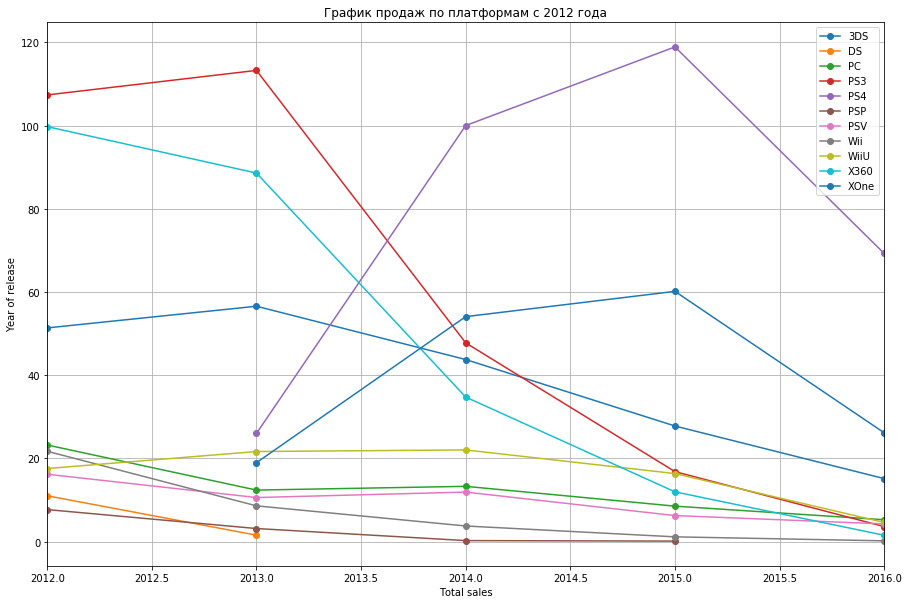

In [41]:
platforms_sales_actual.plot(style='o-', grid=True, figsize=(15, 10));
plt.ylabel('Year of release');
plt.xlabel('Total sales');
plt.title('График продаж по платформам с 2012 года');
plt.legend(loc = 'best');

4. Потенциально прибыльные платформы - **PS4 и XOne**. Они лидируют по объёмам продаж за последние годы + их продажи растут (если не считать неполные данные за 2016 год). И присутствуют на рынке только 4 года.
Кроме них перспективными платформами будем считать молодые платформы **PSV и WiiU**.
А также **PC**. Персональные компьютеры - единственная стабильная платформа.
'PS4', 'XOne', 'PC', 'PSV', 'WiiU' - полный перечень перспективных платформ.


5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

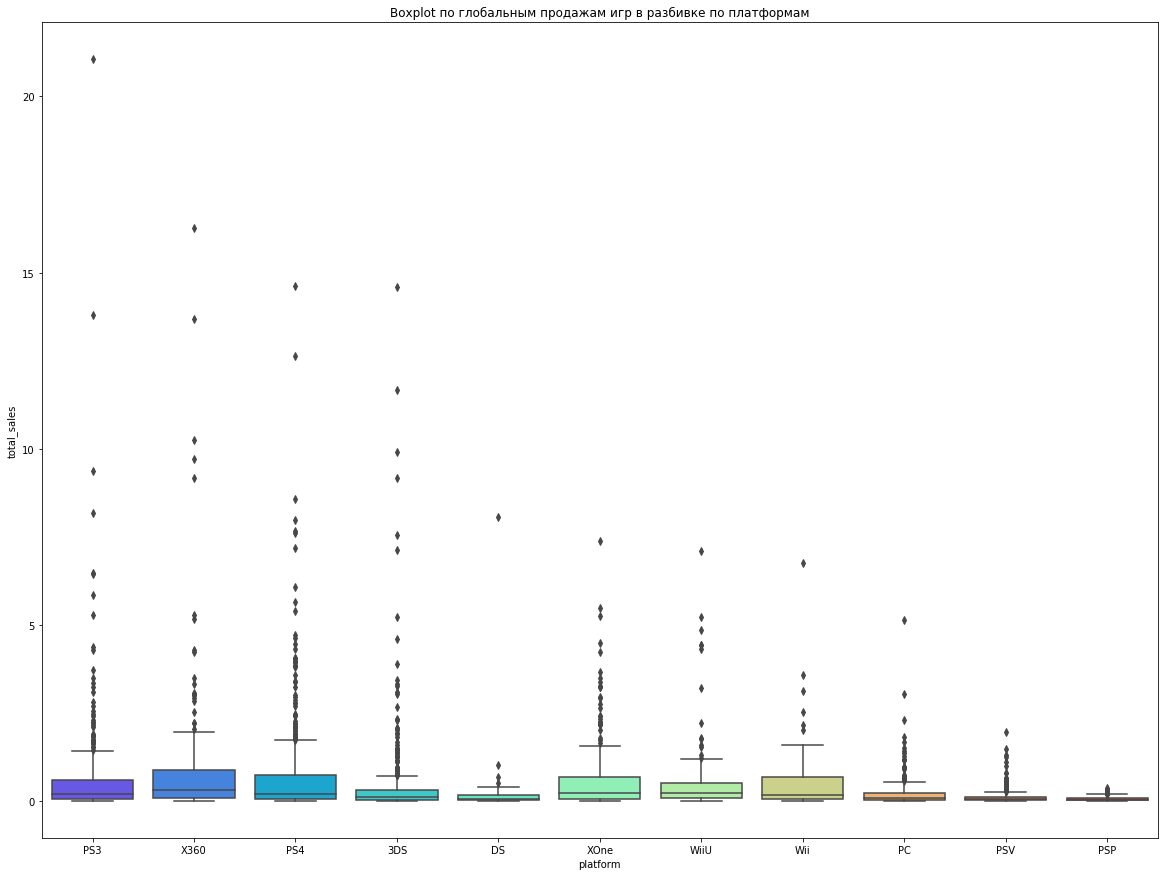

In [42]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="platform", y="total_sales", data=games_actual, palette='rainbow');
plt.title('Boxplot по глобальным продажам игр в разбивке по платформам');

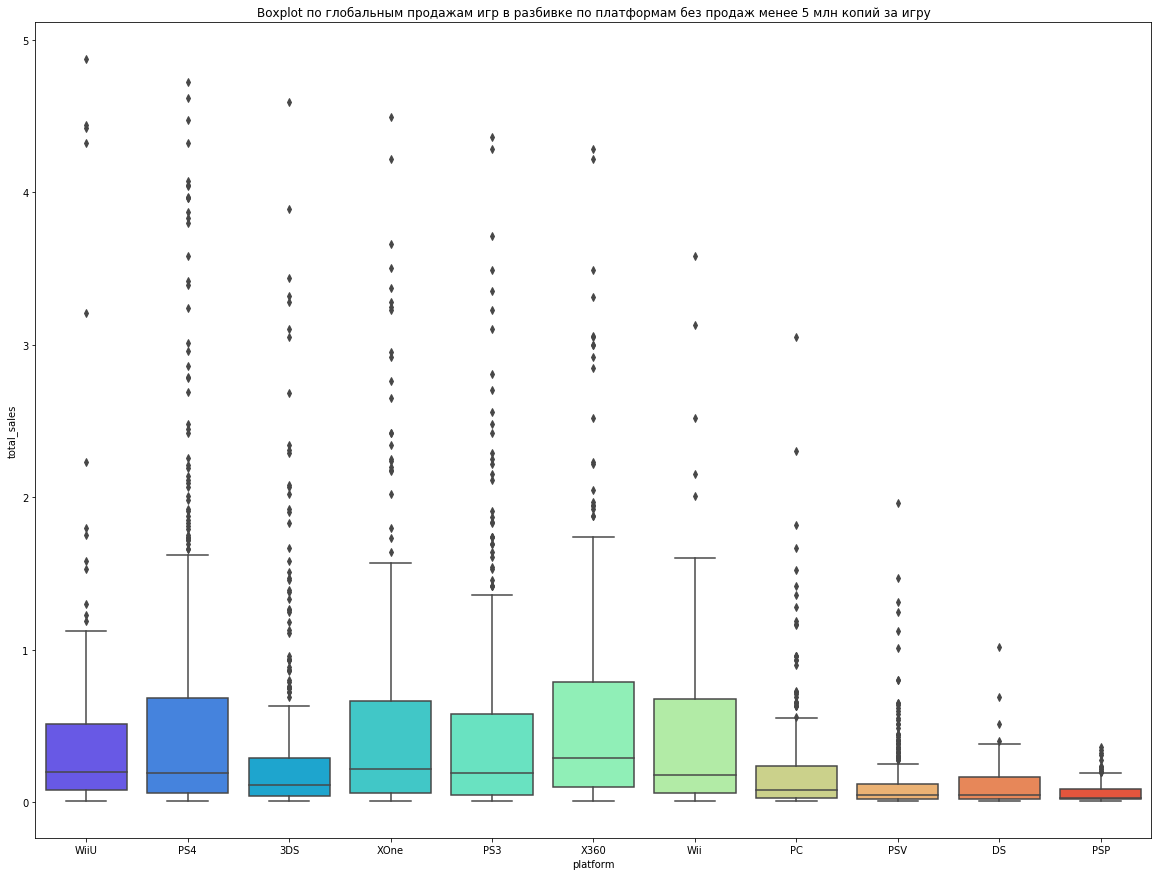

In [43]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="platform", y="total_sales", data=games_actual.query('total_sales < 5'), palette='rainbow');
plt.title('Boxplot по глобальным продажам игр в разбивке по платформам без продаж менее 5 млн копий за игру');

Медианные продажи количества копий одной игры на всех платформах небольшие, но есть платформы, у которых были игры-хиты. 
Однако такие платформы, которые выстреливают одиночными хитами, не относятся к перспективным платформам, выделенным ранее.
Перспективные платформы более стабильны, постоянно производят качественный популярный контент. Для двух самых перспективных платформ - PS4, XOne, а также для платформ X360 и PS3 видно, что и медианные значения, и 3 квартили выше, чем у платформ-конкурентов.


6. Рассмотрим, как **влияют на продажи внутри платформы отзывы пользователей и критиков**. Построим диаграммы рассеяния и посчитаем коэффициенты корреляции. Рассмотрим платформы из ранее сформированного списка перспективных.

Графики зависимости продаж игр от оценки критиков для перспективных платформ


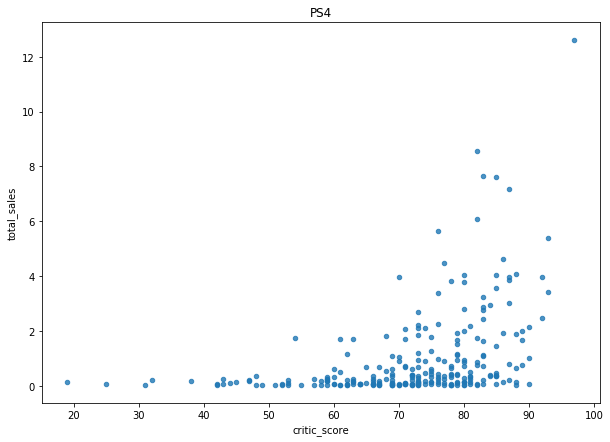

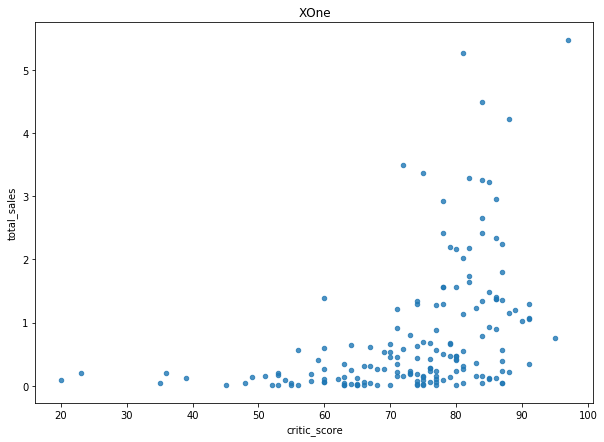

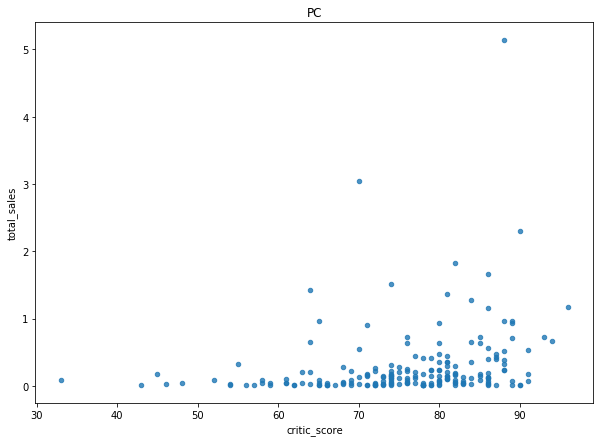

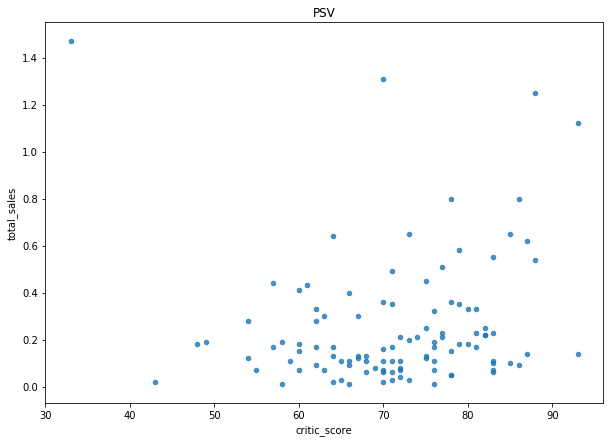

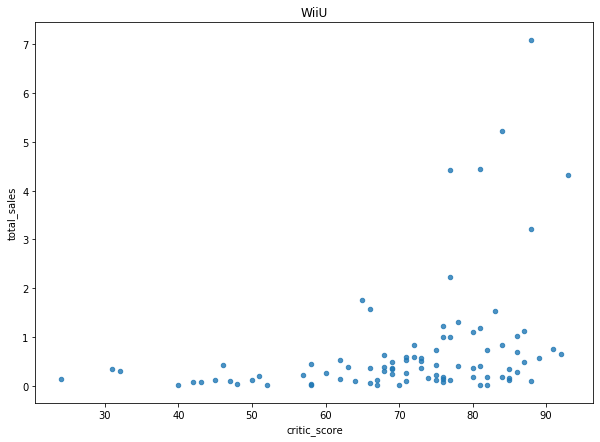

In [44]:
print('Графики зависимости продаж игр от оценки критиков для перспективных платформ')
perspective_platforms = ['PS4', 'XOne', 'PC', 'PSV', 'WiiU']
for name in perspective_platforms:
    chosen = games_actual.query('platform == @name');
    chosen.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8, figsize=(10, 7));
    plt.title(label = name);

Графики зависимости продаж игр от оценки пользователей для перспективных платформ


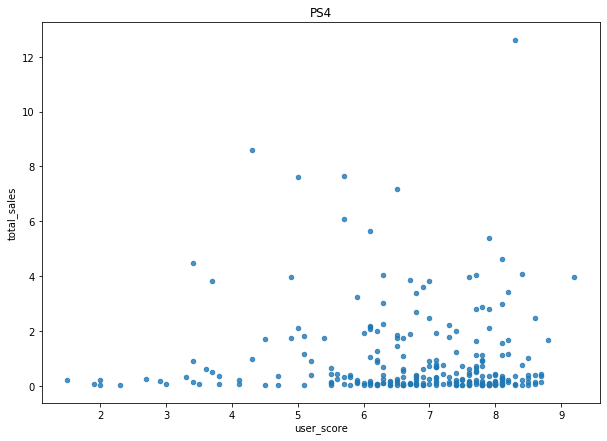

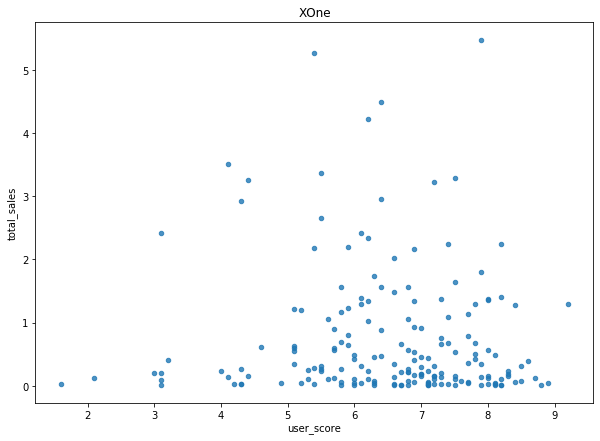

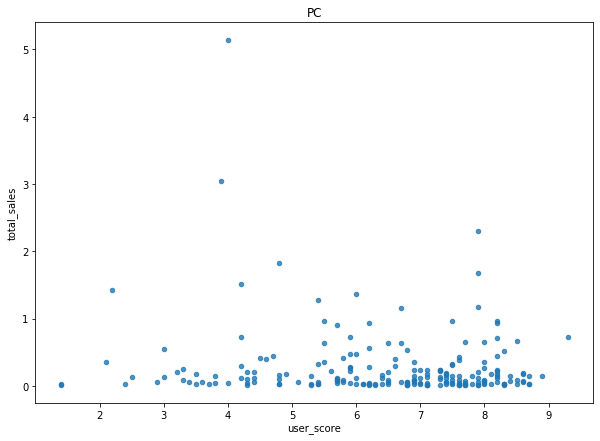

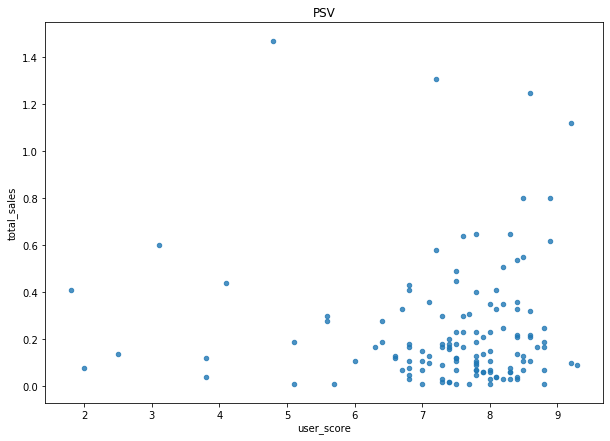

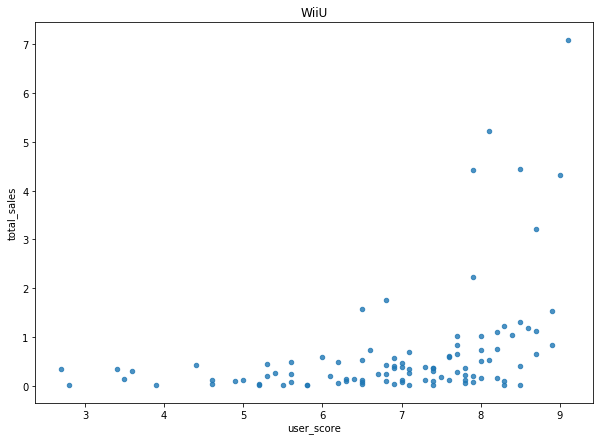

In [45]:
print('Графики зависимости продаж игр от оценки пользователей для перспективных платформ')
perspective_platforms = ['PS4', 'XOne', 'PC', 'PSV', 'WiiU']
for name in perspective_platforms:
    chosen = games_actual.query('platform == @name');
    chosen.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8, figsize=(10, 7));
    plt.title(label = name);

In [46]:
for name in perspective_platforms:
    chosen = games_actual.query('platform == @name')
    print('Коэффициент корреляции продаж игр от оценки критиков для платформы', 
          name, "|{:.1%}|".format(chosen['total_sales'].corr(chosen['critic_score'])))

Коэффициент корреляции продаж игр от оценки критиков для платформы PS4 |40.7%|
Коэффициент корреляции продаж игр от оценки критиков для платформы XOne |41.7%|
Коэффициент корреляции продаж игр от оценки критиков для платформы PC |23.7%|
Коэффициент корреляции продаж игр от оценки критиков для платформы PSV |9.4%|
Коэффициент корреляции продаж игр от оценки критиков для платформы WiiU |34.8%|


In [47]:
for name in perspective_platforms:
    chosen = games_actual.query('platform == @name')    
    print('Коэффициент корреляции продаж игр от оценки пользователей для платформы', 
          name, "|{:.1%}|".format(chosen['total_sales'].corr(chosen['user_score'])))

Коэффициент корреляции продаж игр от оценки пользователей для платформы PS4 |-3.2%|
Коэффициент корреляции продаж игр от оценки пользователей для платформы XOne |-6.9%|
Коэффициент корреляции продаж игр от оценки пользователей для платформы PC |-12.2%|
Коэффициент корреляции продаж игр от оценки пользователей для платформы PSV |-0.4%|
Коэффициент корреляции продаж игр от оценки пользователей для платформы WiiU |40.0%|


Продажи игр для самых перспективных и современных платформ - PS4 и XOne зависят от оценки критиков, однако корреляция не очень сильна - около 40%. Для остальных платформ эта зависимость ещё менее выраженна. Что касается зависимости продаж игр от оценки пользователей, то такая наблюдается только для платформы WiiU.


7. Рассмотрим распределение игр по **жанрам**.

In [48]:
genres = games_actual.pivot_table(index=['genre'], values='total_sales', aggfunc=['sum', 'count'])
genres.columns = ['total_sales', 'games_amount']
genres['sales_per_game'] = genres['total_sales']/genres['games_amount']
genres.sort_values(by = 'total_sales', ascending = False)

,total_sales,games_amount,sales_per_game
genre,,,
Action,441.120,1031,0.428
Shooter,304.730,235,1.297
Role-Playing,192.800,370,0.521
Sports,181.070,268,0.676
Misc,85.040,192,0.443
Platform,61.000,85,0.718
Racing,53.500,115,0.465
Fighting,44.490,109,0.408
Simulation,35.120,80,0.439


In [49]:
genres.sort_values(by = 'sales_per_game', ascending = False)

,total_sales,games_amount,sales_per_game
genre,,,
Shooter,304.730,235,1.297
Platform,61.000,85,0.718
Sports,181.070,268,0.676
Role-Playing,192.800,370,0.521
Racing,53.500,115,0.465
Misc,85.040,192,0.443
Simulation,35.120,80,0.439
Action,441.120,1031,0.428
Fighting,44.490,109,0.408


 Суммарные продажи выше всего в жанрах Action, Shooter и Role-playing. Однако в среднем копий одной игры больше всего продаётся в жанрах Shooter, Platform и Sports. Особенно выделяется жанр Shooter - в нём продаётся в среднем больше миллиона копий  каждой игры. Значит, почти все игры этого жанра становятся успешными. И можно считать жанр самым прибыльным. 

***Выводы***


- Потенциально прибыльные платформы - **PS4 и XOne**. Они лидируют по объёмам продаж за последние годы + их продажи растут (если не считать неполные данные за 2016 год). И присутствуют на рынке только 4 года.
Кроме них перспективными являются молодые платформы **PSV и WiiU**.
А также **PC**. Персональные компьютеры - единственная стабильная платформа.


- Медианные продажи количества копий одной игры на всех платформах небольшие, но есть платформы, у которых были игры-хиты.
Однако такие платформы, которые выстреливают одиночными хитами, не относятся к перспективным платформам, выделенным ранее.
Перспективные платформы более стабильны, постоянно производят качественный популярный контент. Для двух самых перспективных платформ - PS4, XOne, а также для платформ X360 и PS3 видно, что и медианные значения, и 3 квартили выше, чем у платформ-конкурентов.


- Продажи игр для самых перспективных и современных платформ - PS4 и XOne зависят от оценки критиков, однако корреляция не очень сильна - около 40%. Для остальных платформ эта зависимость ещё менее выраженна. Что касается зависимости продаж игр от оценки пользователей, то такая наблюдается только для платформы WiiU.


- Суммарные продажи выше всего в жанрах Action, Shooter и Role-playing. Однако в среднем копий одной игры больше всего продаётся в жанрах Shooter, Platform и Sports. Особенно выделяется жанр Shooter - в нём продаётся в среднем больше миллиона копий каждой игры. Значит, почти все игры этого жанра становятся успешными. И можно считать жанр самым прибыльным. 

<a id="portraits"></a>
# Портреты пользователей по регионам

Обрисуем портреты пользователей по регионам, для этого выделим самые популярные жанры и платформы по регионам, а также рассмотрим влияние рейтинга ESRB на продажи.

<a id="genres"></a>
## Популярные жанры по регионам

In [50]:
sum_sales_na = games_actual['na_sales'].sum()
sum_sales_eu = games_actual['eu_sales'].sum()
sum_sales_jp = games_actual['jp_sales'].sum()
sum_sales_other = games_actual['other_sales'].sum()
display(sum_sales_na)
display(sum_sales_eu)
display(sum_sales_jp)
display(sum_sales_other)

590.97

506.82000000000005

192.58

156.16

In [51]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for columns in regions:
    
    genres_in_regions = games_actual.pivot_table(index=['genre'], values= columns, aggfunc=['sum', 'count'])
    genres_in_regions.columns = ['total_sales', 'games_amount']
    genres_in_regions['sales_per_game'] = genres_in_regions['total_sales']/genres_in_regions['games_amount']
    genres_in_regions['percent_sales'] = genres_in_regions['total_sales']/genres_in_regions['total_sales'].sum()
    genres_in_regions = genres_in_regions.sort_values(by = 'percent_sales', ascending = False)
    print('Самые популярные жанры в регионе', columns)
    display(genres_in_regions.head())

Самые популярные жанры в регионе na_sales


,total_sales,games_amount,sales_per_game,percent_sales
genre,,,,
Action,177.840,1031,0.172,0.301
Shooter,144.770,235,0.616,0.245
Sports,81.530,268,0.304,0.138
Role-Playing,64.000,370,0.173,0.108
Misc,38.190,192,0.199,0.065


Самые популярные жанры в регионе eu_sales


,total_sales,games_amount,sales_per_game,percent_sales
genre,,,,
Action,159.340,1031,0.155,0.314
Shooter,113.470,235,0.483,0.224
Sports,69.090,268,0.258,0.136
Role-Playing,48.530,370,0.131,0.096
Racing,27.290,115,0.237,0.054


Самые популярные жанры в регионе jp_sales


,total_sales,games_amount,sales_per_game,percent_sales
genre,,,,
Role-Playing,65.440,370,0.177,0.340
Action,52.800,1031,0.051,0.274
Misc,12.860,192,0.067,0.067
Simulation,10.410,80,0.130,0.054
Fighting,9.440,109,0.087,0.049


Самые популярные жанры в регионе other_sales


,total_sales,games_amount,sales_per_game,percent_sales
genre,,,,
Action,51.140,1031,0.050,0.327
Shooter,37.260,235,0.159,0.239
Sports,22.440,268,0.084,0.144
Role-Playing,14.830,370,0.040,0.095
Misc,7.670,192,0.040,0.049


In [52]:
genres_in_regions_summary = games_actual.pivot_table(index=['genre'], values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc=['sum'])
genres_in_regions_summary.columns = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales', 'total_sales']
genres_in_regions_summary = genres_in_regions_summary.sort_values(by = 'total_sales', ascending = False)
genres_in_regions_summary

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Action,159.340,52.800,177.840,51.140,441.120
Shooter,113.470,9.230,144.770,37.260,304.730
Role-Playing,48.530,65.440,64.000,14.830,192.800
Sports,69.090,8.010,81.530,22.440,181.070
Misc,26.320,12.860,38.190,7.670,85.040
Platform,21.410,8.630,25.380,5.580,61.000
Racing,27.290,2.500,17.220,6.490,53.500
Fighting,10.790,9.440,19.790,4.470,44.490
Simulation,14.550,10.410,7.970,2.190,35.120


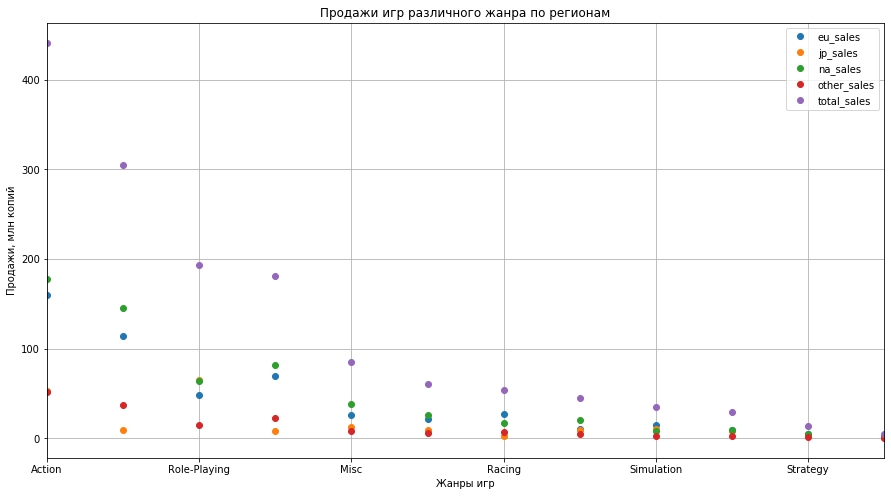

In [53]:
genres_in_regions_summary.plot(style='o', grid=True, figsize=(15, 8));
plt.ylabel('Продажи, млн копий');
plt.xlabel('Жанры игр');
plt.title('Продажи игр различного жанра по регионам');
plt.legend(loc = 'best');

In [54]:
genres_in_regions_summary = genres_in_regions_summary.reset_index()
genres_in_regions_summary

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,159.340,52.800,177.840,51.140,441.120
1,Shooter,113.470,9.230,144.770,37.260,304.730
2,Role-Playing,48.530,65.440,64.000,14.830,192.800
3,Sports,69.090,8.010,81.530,22.440,181.070
4,Misc,26.320,12.860,38.190,7.670,85.040
5,Platform,21.410,8.630,25.380,5.580,61.000
6,Racing,27.290,2.500,17.220,6.490,53.500
7,Fighting,10.790,9.440,19.790,4.470,44.490
8,Simulation,14.550,10.410,7.970,2.190,35.120
9,Adventure,9.460,8.240,8.920,2.810,29.430


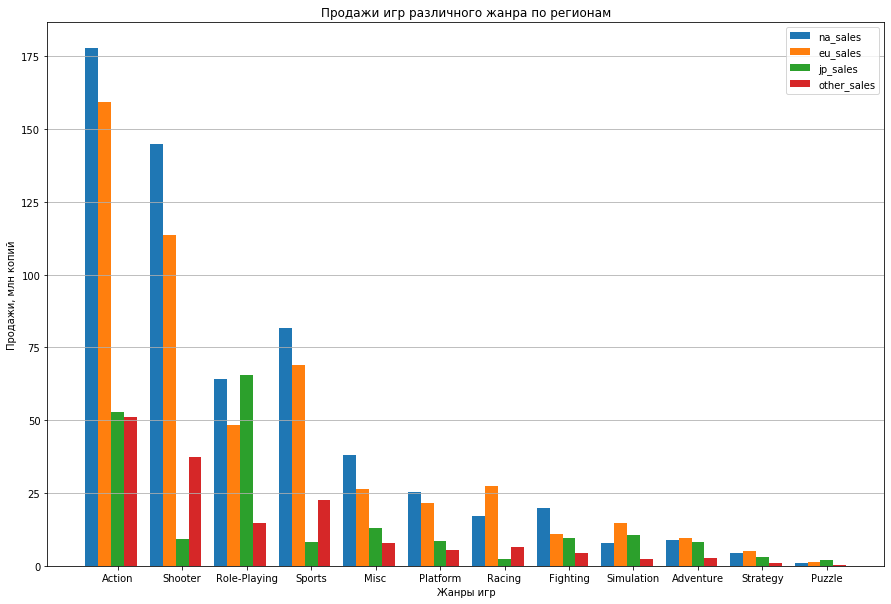

In [55]:
groups = genres_in_regions_summary['genre']
width = 0.2
x = np.arange(len(groups))


fig = plt.figure(figsize = (15, 10) );
ax = plt.axes();
ax.yaxis.grid(True, zorder = 1);
na = plt.bar(x-width*2, genres_in_regions_summary['na_sales'], width, label='na_sales');
eu = plt.bar(x-width, genres_in_regions_summary['eu_sales'], width, label='eu_sales');
jp = plt.bar(x, genres_in_regions_summary['jp_sales'], width, label='jp_sales');
other = plt.bar(x+width, genres_in_regions_summary['other_sales'], width, label='other_sales');
plt.ylabel('Продажи, млн копий');
plt.xlabel('Жанры игр');
plt.title('Продажи игр различного жанра по регионам');
plt.legend(loc = 'best');
plt.xticks(x, groups);

Самые популярные жанры в Северной Америке, Европе и во всех остальных регионах, кроме Японии, совпадают, это Action, Sports и Shooter. Тогда как в Японии особой популярностью пользуется жанр Role-Playing - его продажи составляют почти <font color=blue> 35% </font> от всех продаж в регионе, что даже выше, чем доля продаж самого популярного жанра Action в остальных регионах (она составляет около <font color=blue> 32%</font>).

<a id="platforms"></a>
## Популярные платформы по регионам

In [56]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for columns in regions:
    platforms_in_regions = games_actual.pivot_table(index=['platform'], values= columns, aggfunc=['sum', 'count'])
    platforms_in_regions.columns = ['total_sales', 'games_amount']
    platforms_in_regions['sales_per_game'] = platforms_in_regions['total_sales']/platforms_in_regions['games_amount']
    platforms_in_regions['percent_sales'] = platforms_in_regions['total_sales']/platforms_in_regions['total_sales'].sum()
    platforms_in_regions = platforms_in_regions.sort_values(by = 'percent_sales', ascending = False)
    print('Самые популярные платформы в регионе', columns)
    display(platforms_in_regions.head())

Самые популярные платформы в регионе na_sales


,total_sales,games_amount,sales_per_game,percent_sales
platform,,,,
X360,140.050,292,0.480,0.237
PS4,108.740,392,0.277,0.184
PS3,103.380,493,0.210,0.175
XOne,93.120,247,0.377,0.158
3DS,55.310,396,0.140,0.094


Самые популярные платформы в регионе eu_sales


,total_sales,games_amount,sales_per_game,percent_sales
platform,,,,
PS4,141.090,392,0.360,0.278
PS3,106.860,493,0.217,0.211
X360,74.520,292,0.255,0.147
XOne,51.590,247,0.209,0.102
3DS,42.640,396,0.108,0.084


Самые популярные платформы в регионе jp_sales


,total_sales,games_amount,sales_per_game,percent_sales
platform,,,,
3DS,87.790,396,0.222,0.456
PS3,35.290,493,0.072,0.183
PSV,21.040,411,0.051,0.109
PS4,15.960,392,0.041,0.083
WiiU,13.010,147,0.089,0.068


Самые популярные платформы в регионе other_sales


,total_sales,games_amount,sales_per_game,percent_sales
platform,,,,
PS4,48.350,392,0.123,0.310
PS3,43.260,493,0.088,0.277
X360,20.400,292,0.070,0.131
XOne,14.270,247,0.058,0.091
3DS,8.870,396,0.022,0.057


In [57]:
platforms_in_regions_summary = games_actual.pivot_table(index=['platform'], values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc=['sum'])
platforms_in_regions_summary.columns = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales', 'total_sales']
platforms_in_regions_summary = platforms_in_regions_summary.sort_values(by = 'total_sales', ascending = False)
platforms_in_regions_summary

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PS4,141.090,15.960,108.740,48.350,314.140
PS3,106.860,35.290,103.380,43.260,288.790
X360,74.520,1.570,140.050,20.400,236.540
3DS,42.640,87.790,55.310,8.870,194.610
XOne,51.590,0.340,93.120,14.270,159.320
WiiU,25.130,13.010,38.100,5.950,82.190
PC,37.760,0.000,19.120,5.770,62.650
PSV,11.360,21.040,10.980,5.800,49.180
Wii,11.920,3.390,17.450,2.610,35.370


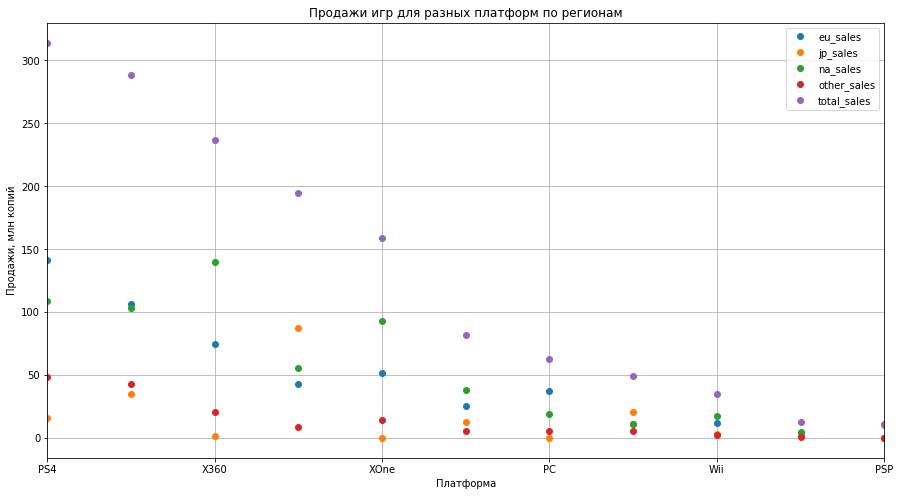

In [58]:
platforms_in_regions_summary.plot(style='o', grid=True, figsize=(15, 8))
plt.ylabel('Продажи, млн копий')
plt.xlabel('Платформа')
plt.title('Продажи игр для разных платформ по регионам')
plt.legend(loc = 'best');

In [59]:
platforms_in_regions_summary = platforms_in_regions_summary.reset_index()
platforms_in_regions_summary

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.090,15.960,108.740,48.350,314.140
1,PS3,106.860,35.290,103.380,43.260,288.790
2,X360,74.520,1.570,140.050,20.400,236.540
3,3DS,42.640,87.790,55.310,8.870,194.610
4,XOne,51.590,0.340,93.120,14.270,159.320
5,WiiU,25.130,13.010,38.100,5.950,82.190
6,PC,37.760,0.000,19.120,5.770,62.650
7,PSV,11.360,21.040,10.980,5.800,49.180
8,Wii,11.920,3.390,17.450,2.610,35.370
9,DS,3.530,3.720,4.590,0.710,12.550


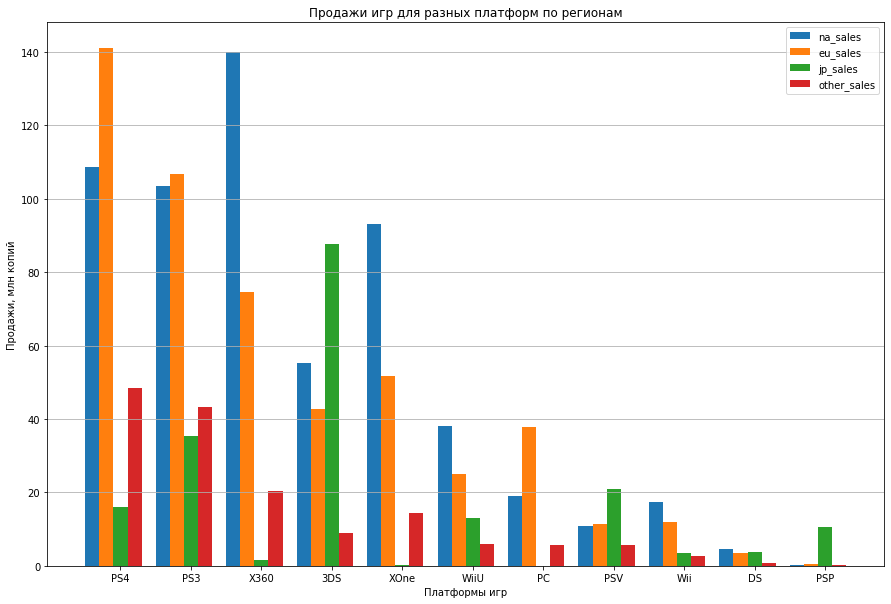

In [60]:
groups2 = platforms_in_regions_summary['platform']
width = 0.2
x2 = np.arange(len(groups2))


fig = plt.figure(figsize = (15, 10) )
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
na2 = plt.bar(x2-width*2, platforms_in_regions_summary['na_sales'], width, label='na_sales')
eu2 = plt.bar(x2-width, platforms_in_regions_summary['eu_sales'], width, label='eu_sales')
jp2 = plt.bar(x2, platforms_in_regions_summary['jp_sales'], width, label='jp_sales')
other2 = plt.bar(x2+width, platforms_in_regions_summary['other_sales'], width, label='other_sales')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Платформы игр')
plt.title('Продажи игр для разных платформ по регионам')
plt.legend(loc = 'best')
plt.xticks(x2, groups2);

***Вывод***

 Платформы X360, PS4, PS3, XOne, 3DS являются самыми популярными почти во всех регионах, кроме Японии.
Единственное, в Америке первое место занимает платформа X360, а в остальных регионах кроме Японии PS4 и PS3. Скорее всего, данное опережение обусловлено большей доступностью платформ.
В Японии платформы 3DS, PS4 и PS3 также входят в топ-5 платформ, однако кроме них в топ входят ещё и WiiU, и PSV. Это объясняется доступом к платформами, а также другим менталитетом пользователей.

<a id="ESRB"></a>
## Влияние рейтинга ESRB на продажи по регионам

Рассмотрим влияние рейтинга ESRB на продажи по регионам.

In [61]:
games_actual_without_nan_ESRB = games_actual
games_actual_without_nan_ESRB['rating'] = games_actual['rating'].fillna('without_rating')
games_actual_without_nan_ESRB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null uint16
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), object(4), uint16(1)
memory usage: 356.2+ KB


In [62]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for columns in regions:
    ESRB_in_regions = games_actual_without_nan_ESRB.pivot_table(index=['rating'], values= columns, aggfunc=['sum', 'count'])
    ESRB_in_regions.columns = ['total_sales', 'games_amount']
    ESRB_in_regions['sales_per_game'] = ESRB_in_regions['total_sales']/ESRB_in_regions['games_amount']
    ESRB_in_regions = ESRB_in_regions.sort_values(by = 'total_sales', ascending = False)
    print('Продажи в зависимости от рейтинга', columns)
    display(ESRB_in_regions)

Продажи в зависимости от рейтинга na_sales


,total_sales,games_amount,sales_per_game
rating,,,
M,231.570,498,0.465
E,114.370,395,0.290
without_rating,103.310,1275,0.081
E10+,75.700,306,0.247
T,66.020,412,0.160


Продажи в зависимости от рейтинга eu_sales


,total_sales,games_amount,sales_per_game
rating,,,
M,193.960,498,0.389
E,113.030,395,0.286
without_rating,91.500,1275,0.072
E10+,55.370,306,0.181
T,52.960,412,0.129


Продажи в зависимости от рейтинга jp_sales


,total_sales,games_amount,sales_per_game
rating,,,
without_rating,108.840,1275,0.085
E,28.330,395,0.072
T,26.020,412,0.063
M,21.200,498,0.043
E10+,8.190,306,0.027


Продажи в зависимости от рейтинга other_sales


,total_sales,games_amount,sales_per_game
rating,,,
M,63.380,498,0.127
E,31.440,395,0.080
without_rating,27.170,1275,0.021
T,17.940,412,0.044
E10+,16.230,306,0.053


In [63]:
ESRB_in_regions_summary = games_actual_without_nan_ESRB.pivot_table(index=['rating'], values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])
ESRB_in_regions_summary.columns = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']
ESRB_in_regions_summary = ESRB_in_regions_summary.sort_values(by = 'na_sales', ascending = False)
ESRB_in_regions_summary = ESRB_in_regions_summary.reset_index()
ESRB_in_regions_summary

,rating,eu_sales,jp_sales,na_sales,other_sales
0,M,193.960,21.200,231.570,63.380
1,E,113.030,28.330,114.370,31.440
2,without_rating,91.500,108.840,103.310,27.170
3,E10+,55.370,8.190,75.700,16.230
4,T,52.960,26.020,66.020,17.940


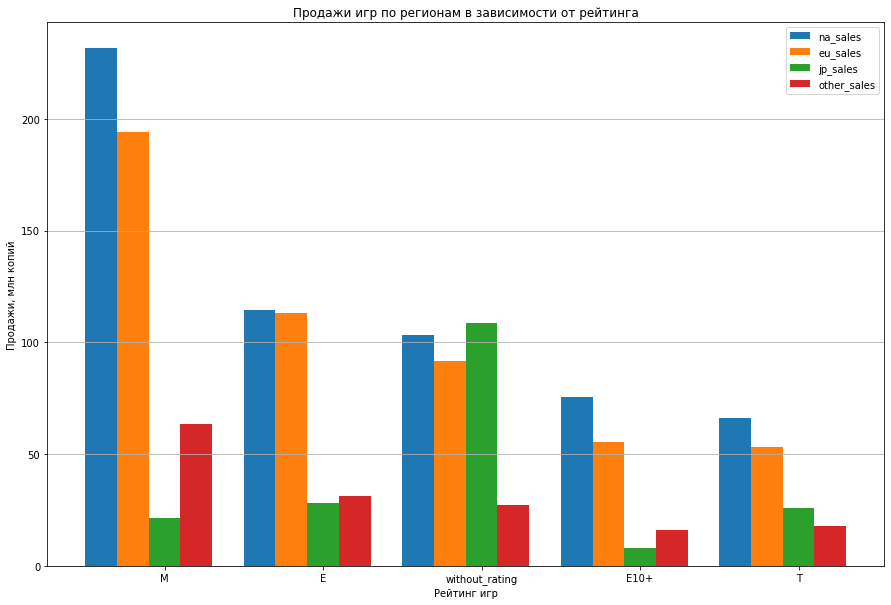

In [64]:
groups3 = ESRB_in_regions_summary['rating']
width = 0.2
x3 = np.arange(len(groups3))


fig = plt.figure(figsize = (15, 10) )
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
na3 = plt.bar(x3-width*2, ESRB_in_regions_summary['na_sales'], width, label='na_sales')
eu3 = plt.bar(x3-width, ESRB_in_regions_summary['eu_sales'], width, label='eu_sales')
jp3 = plt.bar(x3, ESRB_in_regions_summary['jp_sales'], width, label='jp_sales')
other3 = plt.bar(x3+width, ESRB_in_regions_summary['other_sales'], width, label='other_sales')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Рейтинг игр')
plt.title('Продажи игр по регионам в зависимости от рейтинга')
plt.legend(loc = 'best')
plt.xticks(x3, groups3);

- «E» («Everyone») 
- «M» («Mature»)
- «T» («Teen»)
- «E10+» («Everyone 10 and older»)
- «EC» («Early childhood»)
- «AO» («Adults Only 18+») 
- «RP» («Rating Pending»)

**Вывод**

Больше всего во всех регионах (кроме Японии) продаются игры с рейтингом "Для взрослых". На втором месте продажи игр для всех, на третьем - продажи игр без рейтинга. В Японии в основном продаются игры без рейтинга, т.к. организация, присваивающая рейтинги - американская. Но, если смотреть на продажи игр с рейтингом в Японии, то можно заметить, что в Японии очень популярны игры для тинэйджеров - их продаётся почти столько же, сколько и игр для всех.

***Выводы***


Самые популярные жанры в Северной Америке, Европе и во всех остальных регионах, кроме Японии, совпадают, это Action, Sports и Shooter. Тогда как в Японии особой популярностью пользуется жанр Role-Playing - его продажи составляют почти 30% от всех продаж в регионе, что даже выше, чем доля продаж самого популярного жанра Action в остальных регионах (она составляет около 23%).

 Платформы X360, PS4, PS3, XOne, 3DS являются самыми популярными почти во всех регионах, кроме Японии.
Единственное, в Америке первое место занимает платформа X360, а в остальных регионах кроме Японии PS4 и PS3. Скорее всего, данное опережение обусловлено большей доступностью платформ.
В Японии платформы 3DS, PS4 и PS3 также входят в топ-5 платформ, однако кроме них в топ входят ещё и WiiU, и PSV. Это объясняется доступом к платформами, а также другим менталитетом пользователей.

Больше всего во всех регионах (кроме Японии) продаются игры с рейтингом "Для взрослых". На втором месте продажи игр для всех, на третьем - продажи игр без рейтинга. В Японии в основном продаются игры без рейтинга, т.к. организация, присваивающая рейтинги - американская. Но, если смотреть на продажи игр с рейтингом в Японии, то можно заметить, что в Японии очень популярны игры для тинэйджеров - их продаётся почти столько же, сколько и игр для всех.

<a id="hypotesis"></a>
# Проверка гипотез

<a id="hypotesis1"></a>
## Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Создадим выборки для платформ Xbox One и PC.

In [65]:
games_actual_XOne = games_actual.query('platform == "XOne"')
games_actual_XOne = games_actual_XOne[games_actual_XOne['user_score'].isnull() != True]
games_actual_XOne.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,182.000,182.000,182.000,182.000,182.000,165.000,182.000,182.000
mean,2014.934,0.432,0.238,0.002,0.066,73.618,6.521,0.738
std,0.989,0.621,0.377,0.006,0.093,12.884,1.381,1.018
min,2013.000,0.000,0.000,0.000,0.000,20.000,1.600,0.010
25%,2014.000,0.040,0.020,0.000,0.010,67.000,5.800,0.082
50%,2015.000,0.170,0.090,0.000,0.030,76.000,6.800,0.300
75%,2016.000,0.558,0.275,0.000,0.090,83.000,7.500,1.058
max,2016.000,3.220,2.190,0.040,0.480,97.000,9.200,5.470


In [66]:
games_actual_PC = games_actual.query('platform == "PC"')
games_actual_PC = games_actual_PC[games_actual_PC['user_score'].isnull() != True]
games_actual_PC.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,206.000,206.000,206.000,206.000,206.000,197.000,206.000,206.000
mean,2013.971,0.087,0.166,0.000,0.026,75.878,6.429,0.279
std,1.491,0.227,0.267,0.000,0.057,10.400,1.664,0.530
min,2012.000,0.000,0.000,0.000,0.000,33.000,1.400,0.010
25%,2013.000,0.000,0.030,0.000,0.000,71.000,5.500,0.033
50%,2014.000,0.005,0.070,0.000,0.010,78.000,6.800,0.110
75%,2015.000,0.090,0.160,0.000,0.020,83.000,7.700,0.278
max,2016.000,2.440,2.160,0.000,0.540,96.000,9.300,5.140


Проверим по критерию Левена гипотезу о равенстве дисперсий этих двух выборок.

In [68]:
alpha = .05
results = levene(games_actual_XOne['user_score'], games_actual_PC['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий двух выборок")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве дисперсий двух выборок")

p-значение: 0.01251484281850554
Отвергаем нулевую гипотезу о равенстве дисперсий двух выборок


Чтобы проверить, одинаковы ли пользовательские рейтинги для платформ Xbox One и PC по взятым из них выборкам, сформулируем и проверим следующие статистические гипотезы:

- нулевая гипотеза H₀: средний пользовательский рейтинг генеральной совокупности платформы Xbox One равен среднему пользовательскому рейтингу генеральной совокупности платформы PC;

- альтернативная гипотеза H₁: средний пользовательский рейтинг генеральной совокупности платформы Xbox One не равен среднему пользовательскому рейтингу генеральной совокупности платформы PC.

Установим уровень значимости alpha = 0.05 Если p-value окажется меньше него - отвергнем гипотезу H₀ 
Установим параметр equal_var = False в результате предыдущих вычислений.
Используем t-тест Стьюдента для проверки гипотез.

In [69]:
alpha = .05
results = st.ttest_ind(games_actual_XOne['user_score'], games_actual_PC['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов генеральных совокупностей платформ Xbox One и PC, что логично, т.к. PC - это просто персональный компьютер, а не специализированная игровая платформа.

<a id="hypotesis2"></a>
## Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

Создадим выборки для жанров Action и Sports.

In [70]:
games_actual_Action = games_actual.query('genre == "Action"')
games_actual_Action = games_actual_Action[games_actual_Action['user_score'].isnull() != True]
games_actual_Action.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,523.000,523.000,523.000,523.000,523.000,432.000,523.000,523.000
mean,2013.843,0.296,0.266,0.043,0.086,71.502,6.825,0.691
std,1.427,0.667,0.668,0.112,0.247,12.031,1.374,1.555
min,2012.000,0.000,0.000,0.000,0.000,24.000,1.600,0.010
25%,2012.000,0.020,0.020,0.000,0.010,65.000,6.250,0.090
50%,2014.000,0.100,0.090,0.000,0.030,73.500,7.100,0.270
75%,2015.000,0.330,0.270,0.030,0.080,80.000,7.800,0.735
max,2016.000,9.660,9.090,1.110,3.960,97.000,9.100,21.050


In [71]:
games_actual_Sports = games_actual.query('genre == "Sports"')
games_actual_Sports = games_actual_Sports[games_actual_Sports['user_score'].isnull() != True]
games_actual_Sports.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,195.000,195.000,195.000,195.000,195.000,141.000,195.000,195.000
mean,2014.082,0.409,0.340,0.017,0.112,73.340,5.456,0.878
std,1.371,0.562,0.832,0.057,0.194,15.112,1.739,1.270
min,2012.000,0.000,0.000,0.000,0.000,19.000,0.200,0.010
25%,2013.000,0.040,0.025,0.000,0.020,69.000,4.300,0.125
50%,2014.000,0.170,0.110,0.000,0.040,78.000,5.700,0.450
75%,2015.000,0.540,0.270,0.000,0.130,83.000,6.800,0.955
max,2016.000,2.600,6.120,0.490,1.370,90.000,8.800,8.580


Проверим по критерию Левена гипотезу о равенстве дисперсий этих двух выборок.

In [73]:
alpha = .05
results = levene(games_actual_Sports['user_score'], games_actual_Action['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий двух выборок")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве дисперсий двух выборок")

p-значение: 1.3125789036876737e-05
Отвергаем нулевую гипотезу о равенстве дисперсий двух выборок


Чтобы проверить, различаются ли пользовательские рейтинги жанров Action и Sports по взятым из них выборкам, сформулируем и проверим следующие статистические гипотезы:

- нулевая гипотеза H₀: средний пользовательский рейтинг генеральной совокупности жанра Action равен среднему пользовательскому рейтингу генеральной совокупности жанра Sports;

- альтернативная гипотеза H₁: средний пользовательский рейтинг генеральной совокупности жанра Action не равен среднему пользовательскому рейтингу генеральной совокупности жанра Sports.

Установим уровень значимости alpha = 0.05 Если p-value окажется меньше него - отвергнем гипотезу H₀ 
Установим параметр equal_var = False в результате предыдущих вычислений.
Используем t-тест Стьюдента для проверки гипотез.

In [74]:
alpha = .05
results = st.ttest_ind(games_actual_Sports['user_score'], games_actual_Action['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов генеральных совокупностей жанров Action и Sports, нельзя отвергнуть альтернативную гипотезу о равенстве средних пользовательских рейтингов генеральных совокупностей жанров Action и Sport.

***Вывод***

Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов генеральных совокупностей платформ Xbox One и PC.
Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов генеральных совокупностей жанров Action и Sports.

<a id="summary"></a>
# Общий вывод

В ходе данной работы был проанализирован рынок компьютерных игр, изменение продаж по годам и платформам на базе актуального периода с 2005 года. И были сделаны следующие выводы:

- Потенциально прибыльные платформы - PS4 и XOne. Они лидируют по объёмам продаж за последние годы + их продажи растут (если не считать неполные данные за 2016 год). И присутствуют на рынке только 4 года. Кроме них перспективными являются молодые платформы PSV и WiiU. А также PC. Персональные компьютеры - единственная стабильная платформа.

- Медианные продажи количества копий одной игры на всех платформах небольшие, но есть платформы, у которых были игры-хиты.  Однако такие платформы, которые выстреливают одиночными хитами, не относятся к перспективным платформам, выделенным ранее. Перспективные платформы более стабильны, постоянно производят качественный популярный контент. Для двух самых перспективных платформ - PS4, XOne, а также для платформ X360 и PS3 видно, что и медианные значения, и 3 квартили выше, чем у платформ-конкурентов.

- Продажи игр для самых перспективных и современных платформ - PS4 и XOne зависят от оценки критиков, однако корреляция не очень сильна - около 40%. Для остальных платформ эта зависимость ещё менее выраженна. Что касается зависимости продаж игр от оценки пользователей, то такая наблюдается только для платформы WiiU.

- Суммарные продажи выше всего в жанрах Action, Shooter и Role-playing. Однако в среднем копий одной игры больше всего продаётся в жанрах Shooter, Platform и Sports. Особенно выделяется жанр Shooter - в нём продаётся в среднем больше миллиона копий каждой игры. Значит, почти все игры этого жанра становятся успешными. И можно считать жанр самым прибыльным. 

- Самые популярные жанры в Северной Америке, Европе и во всех остальных регионах, кроме Японии, совпадают, это Action, Sports и Shooter. Тогда как в Японии особой популярностью пользуется жанр Role-Playing - его продажи составляют почти 30% от всех продаж в регионе, что даже выше, чем доля продаж самого популярного жанра Action в остальных регионах (она составляет около 23%).

- Платформы X360, PS4, PS3, XOne, 3DS являются самыми популярными почти во всех регионах, кроме Японии.
Единственное, в Америке первое место занимает платформа X360, а в остальных регионах кроме Японии PS4 и PS3. Скорее всего, данное опережение обусловлено большей доступностью платформ.
В Японии платформы 3DS, PS4 и PS3 также входят в топ-5 платформ, однако кроме них в топ входят ещё и WiiU, и PSV. Это объясняется доступом к платформами, а также другим менталитетом пользователей. 

- Больше всего во всех регионах (кроме Японии) продаются игры с рейтингом "Для взрослых". На втором месте продажи игр для всех, на третьем - продажи игр без рейтинга. В Японии в основном продаются игры без рейтинга, т.к. организация, присваивающая рейтинги - американская. Но, если смотреть на продажи игр с рейтингом в Японии, то можно заметить, что в Японии очень популярны игры для тинэйджеров - их продаётся почти столько же, сколько и игр для всех.

- В целом портрет пользователя в Японии сильно отличается от портретов пользователей других регионов.

- Были отвергнуты нулевая гипотеза о равенстве средних пользовательских рейтингов генеральных совокупностей платформ Xbox One и PC, а также нулевая гипотеза о равенстве средних пользовательских рейтингов генеральных совокупностей жанров Action и Sports.


Интернет-магазину можно порекомендовать:

1. Сконцентрироваться на продаже игр для потенциально прибыльных платформ - PS4 и XOne.

2. Следить за оценками критиков при планировании рекламных кампаний.

3. Сконцентрироваться на продаже жанров Action, Shooter и Role-Playing.

4. Создать отдельную рекламную кампанию для Японии.
